In [18]:
# just create database in pgadmin name "chicago_crime_db" and run all programs 

import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import time
from sodapy import Socrata

In [19]:
#define json file
json_file = "https://data.cityofchicago.org/resource/kn9c-c2s2.json"
chicago_socialecnom_df = pd.read_json(json_file)
#resourses https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2


In [20]:
#chicago_socialecnom_df.dtypes

In [21]:
chicago_socialecnom_df.head()

,ca,community_area_name,hardship_index,per_capita_income_,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,percent_households_below_poverty,percent_of_housing_crowded
0,1.0,Rogers Park,39.0,23939,8.7,18.2,27.5,23.6,7.7
1,2.0,West Ridge,46.0,23040,8.8,20.8,38.5,17.2,7.8
2,3.0,Uptown,20.0,35787,8.9,11.8,22.2,24.0,3.8
3,4.0,Lincoln Square,17.0,37524,8.2,13.4,25.5,10.9,3.4
4,5.0,North Center,6.0,57123,5.2,4.5,26.2,7.5,0.3


In [22]:
#selection of attribute from main table
new_chicago_soc_df = chicago_socialecnom_df[['ca','community_area_name','per_capita_income_','percent_aged_16_unemployed','percent_aged_25_without_high_school_diploma','percent_aged_under_18_or_over_64','percent_households_below_poverty','percent_of_housing_crowded']].copy()
new_chicago_soc_df.head()


,ca,community_area_name,per_capita_income_,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,percent_households_below_poverty,percent_of_housing_crowded
0,1.0,Rogers Park,23939,8.7,18.2,27.5,23.6,7.7
1,2.0,West Ridge,23040,8.8,20.8,38.5,17.2,7.8
2,3.0,Uptown,35787,8.9,11.8,22.2,24.0,3.8
3,4.0,Lincoln Square,37524,8.2,13.4,25.5,10.9,3.4
4,5.0,North Center,57123,5.2,4.5,26.2,7.5,0.3


In [23]:
#transform dataframe
transf_chic_soc = ['ca','community_area_name','per_capita_income_','percent_aged_16_unemployed','percent_aged_25_without_high_school_diploma','percent_aged_under_18_or_over_64','percent_households_below_poverty','percent_of_housing_crowded']
transfer_chicago_spc = new_chicago_soc_df[transf_chic_soc].copy()

In [24]:
#rename the column header
transfer_chicago_spc = transfer_chicago_spc.rename(columns={"ca":"ward_no",
                                                           "community_area_name":"Areaname",
                                                           "per_capita_income_":"income_per_capital",
                                                           "percent_aged_16_unemployed":"sixteen_plus_unemployed",
                                                           "percent_aged_25_without_high_school_diploma":"twenty_plus_without_diploma",
                                                           "percent_aged_under_18_or_over_64":"population_eighteen_sixtyfour",
                                                           "percent_households_below_poverty":"population_below",
                                                           "percent_of_housing_crowded":"overpopulation"})
transfer_chicago_spc.head()
#table name in data base is "chicago_economy"

,ward_no,Areaname,income_per_capital,sixteen_plus_unemployed,twenty_plus_without_diploma,population_eighteen_sixtyfour,population_below,overpopulation
0,1.0,Rogers Park,23939,8.7,18.2,27.5,23.6,7.7
1,2.0,West Ridge,23040,8.8,20.8,38.5,17.2,7.8
2,3.0,Uptown,35787,8.9,11.8,22.2,24.0,3.8
3,4.0,Lincoln Square,37524,8.2,13.4,25.5,10.9,3.4
4,5.0,North Center,57123,5.2,4.5,26.2,7.5,0.3


In [25]:
#transfer_chicago_spc.dtypes

In [26]:
area_df = ['ca','community_area_name']
area_code_df = chicago_socialecnom_df[area_df].copy()

In [27]:
#rename the column header
area_code_df = area_code_df.rename(columns={"ca":"ward_no",
                                    "community_area_name":"Areaname"})
area_code_df.head()


,ward_no,Areaname
0,1.0,Rogers Park
1,2.0,West Ridge
2,3.0,Uptown
3,4.0,Lincoln Square
4,5.0,North Center


In [28]:
#json file
crime_df = pd.DataFrame()
for i in range(40):
    offset = 2000*i
    limit = 2000
    df = pd.read_json(f"https://data.cityofchicago.org/resource/crimes.json?$limit=2000&$offset={offset}")
    crime_df = crime_df.append(other=df)

In [29]:
crime_df.head()

,:@computed_region_43wa_7qmu,:@computed_region_6mkv_f3dw,:@computed_region_awaf_s7ux,:@computed_region_bdys_3d7i,:@computed_region_d3ds_rm58,:@computed_region_d9mm_jgwp,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,arrest,beat,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,612,...,NaN,NaN,APARTMENT,NaN,THEFT,2019-08-13T16:18:46.000,21.0,NaN,NaN,2019
1,2.0,21867.0,44.0,319.0,274.0,13.0,58.0,64.0,False,825,...,41.776564,"{'latitude': '41.776563641', 'longitude': '-87...",RESIDENCE,-87.688460,OTHER OFFENSE,2019-08-13T16:18:46.000,16.0,1160147.0,1861830.0,2019
2,18.0,21186.0,13.0,724.0,19.0,5.0,53.0,57.0,False,1922,...,41.951472,"{'latitude': '41.951472099', 'longitude': '-87...",APARTMENT,-87.667426,OTHER OFFENSE,2019-08-13T16:18:46.000,44.0,1165390.0,1925610.0,2019
3,43.0,21861.0,30.0,601.0,265.0,10.0,19.0,47.0,True,531,...,41.692834,"{'latitude': '41.692833841', 'longitude': '-87...",POLICE FACILITY/VEH PARKING LOT,-87.604319,CRIMINAL TRESPASS,2019-08-13T16:18:46.000,9.0,1183356.0,1831503.0,2019
4,36.0,21182.0,22.0,104.0,71.0,14.0,6.0,37.0,False,1833,...,41.898768,"{'latitude': '41.898767916', 'longitude': '-87...",PARKING LOT/GARAGE(NON.RESID.),-87.624116,THEFT,2019-08-13T16:18:46.000,2.0,1177330.0,1906499.0,2019


In [61]:
crime_df.shape

(80000, 30)

In [68]:
new_crime_df = crime_df[['ward','primary_type','arrest','location_description','year']].copy()
new_crime_df.head()

,ward,primary_type,arrest,location_description,year
0,21.0,THEFT,False,APARTMENT,2019
1,16.0,OTHER OFFENSE,False,RESIDENCE,2019
2,44.0,OTHER OFFENSE,False,APARTMENT,2019
3,9.0,CRIMINAL TRESPASS,True,POLICE FACILITY/VEH PARKING LOT,2019
4,2.0,THEFT,False,PARKING LOT/GARAGE(NON.RESID.),2019


In [69]:
#new_crime_df.shape

In [70]:
#transform dataframe
transf_crime_df = ['ward','primary_type','arrest','year','location_description']
transf_crime_chicago = new_crime_df[transf_crime_df].copy()

In [71]:
# Rename the column headers
transf_crime_chicago = transf_crime_chicago.rename(columns={"ward": "ward_no",
                                                          "primary_type": "Crime type",
                                                          "arrest": "Arrest",
                                                           "year":"Year",
                                                            "location_description":"Crime location"})

In [72]:
transf_crime_chicago.head()

,ward_no,Crime type,Arrest,Year,Crime location
0,21.0,THEFT,False,2019,APARTMENT
1,16.0,OTHER OFFENSE,False,2019,RESIDENCE
2,44.0,OTHER OFFENSE,False,2019,APARTMENT
3,9.0,CRIMINAL TRESPASS,True,2019,POLICE FACILITY/VEH PARKING LOT
4,2.0,THEFT,False,2019,PARKING LOT/GARAGE(NON.RESID.)


In [40]:
### Create database connection
rds_connection_string = f"postgres:sherkhan@localhost:5432/chicago_crime_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [41]:
engine.table_names()

In [ ]:
#inserting and creating table in database
transfer_chicago_spc.to_sql(name='chicago_economy', con=engine, if_exists='append', index=True)


In [ ]:
#reading data from database
pd.read_sql_query('select * from chicago_economy', con=engine).head()

In [ ]:
#inserting and creating table in database
area_code_df.to_sql(name='area', con=engine, if_exists='append', index=False)

In [ ]:
#reading data from database
pd.read_sql_query('select * from area', con=engine).head()

In [ ]:
#inserting and creating table in database
transf_crime_chicago.to_sql(name='chicago_crime', con=engine, if_exists='append', index=False)

In [ ]:
#reading data from database
pd.read_sql_query('select * from chicago_crime', con=engine).head()

## Part 2

In [109]:
agr_crime_df = transf_crime_chicago.loc[:, ["ward_no","Crime type"]] 
agr_crime_df

,ward_no,Crime type
0,21.0,THEFT
1,16.0,OTHER OFFENSE
2,44.0,OTHER OFFENSE
3,9.0,CRIMINAL TRESPASS
4,2.0,THEFT
5,34.0,ROBBERY
6,12.0,BATTERY
7,46.0,BURGLARY
8,48.0,BATTERY
9,42.0,THEFT


In [119]:
crime_number_df = pd.DataFrame(agr_crime_df.groupby("ward_no")["Crime type"].count())
crime_number_df.reset_index(inplace=True)
crime_number_df.columns = ["ward_no","crime_num"]
crime_number_df

,ward_no,crime_num
0,1.0,1517
1,2.0,1631
2,3.0,2268
3,4.0,2125
4,5.0,1841
5,6.0,3088
6,7.0,2305
7,8.0,2582
8,9.0,2498
9,10.0,1158


In [126]:
main_df = pd.merge(crime_number_df, transfer_chicago_spc,how="inner", on="ward_no")
main_df

,ward_no,crime_num,Areaname,income_per_capital,sixteen_plus_unemployed,twenty_plus_without_diploma,population_eighteen_sixtyfour,population_below,overpopulation
0,1.0,1517,Rogers Park,23939,8.7,18.2,27.5,23.6,7.7
1,2.0,1631,West Ridge,23040,8.8,20.8,38.5,17.2,7.8
2,3.0,2268,Uptown,35787,8.9,11.8,22.2,24.0,3.8
3,4.0,2125,Lincoln Square,37524,8.2,13.4,25.5,10.9,3.4
4,5.0,1841,North Center,57123,5.2,4.5,26.2,7.5,0.3
5,6.0,3088,Lake View,60058,4.7,2.6,17.0,11.4,1.1
6,7.0,2305,Lincoln Park,71551,5.1,3.6,21.5,12.3,0.8
7,8.0,2582,Near North Side,88669,7.0,2.5,22.6,12.9,1.9
8,9.0,2498,Edison Park,40959,6.5,7.4,35.3,3.3,1.1
9,10.0,1158,Norwood Park,32875,9.0,11.5,39.5,5.4,2.0


In [125]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [143]:
from matplotlib import rcParams


In [146]:
rcParams.figsize = 18,16

In [150]:
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
# import cufflinks as cf
%matplotlib inline
rcParams['figure.figsize'] = 18,15
%config InlineBackend.figure_formats =['retina']
plt.rc('lines', linewidth=1)
# plt.style.use('seaborn-whitegrid')

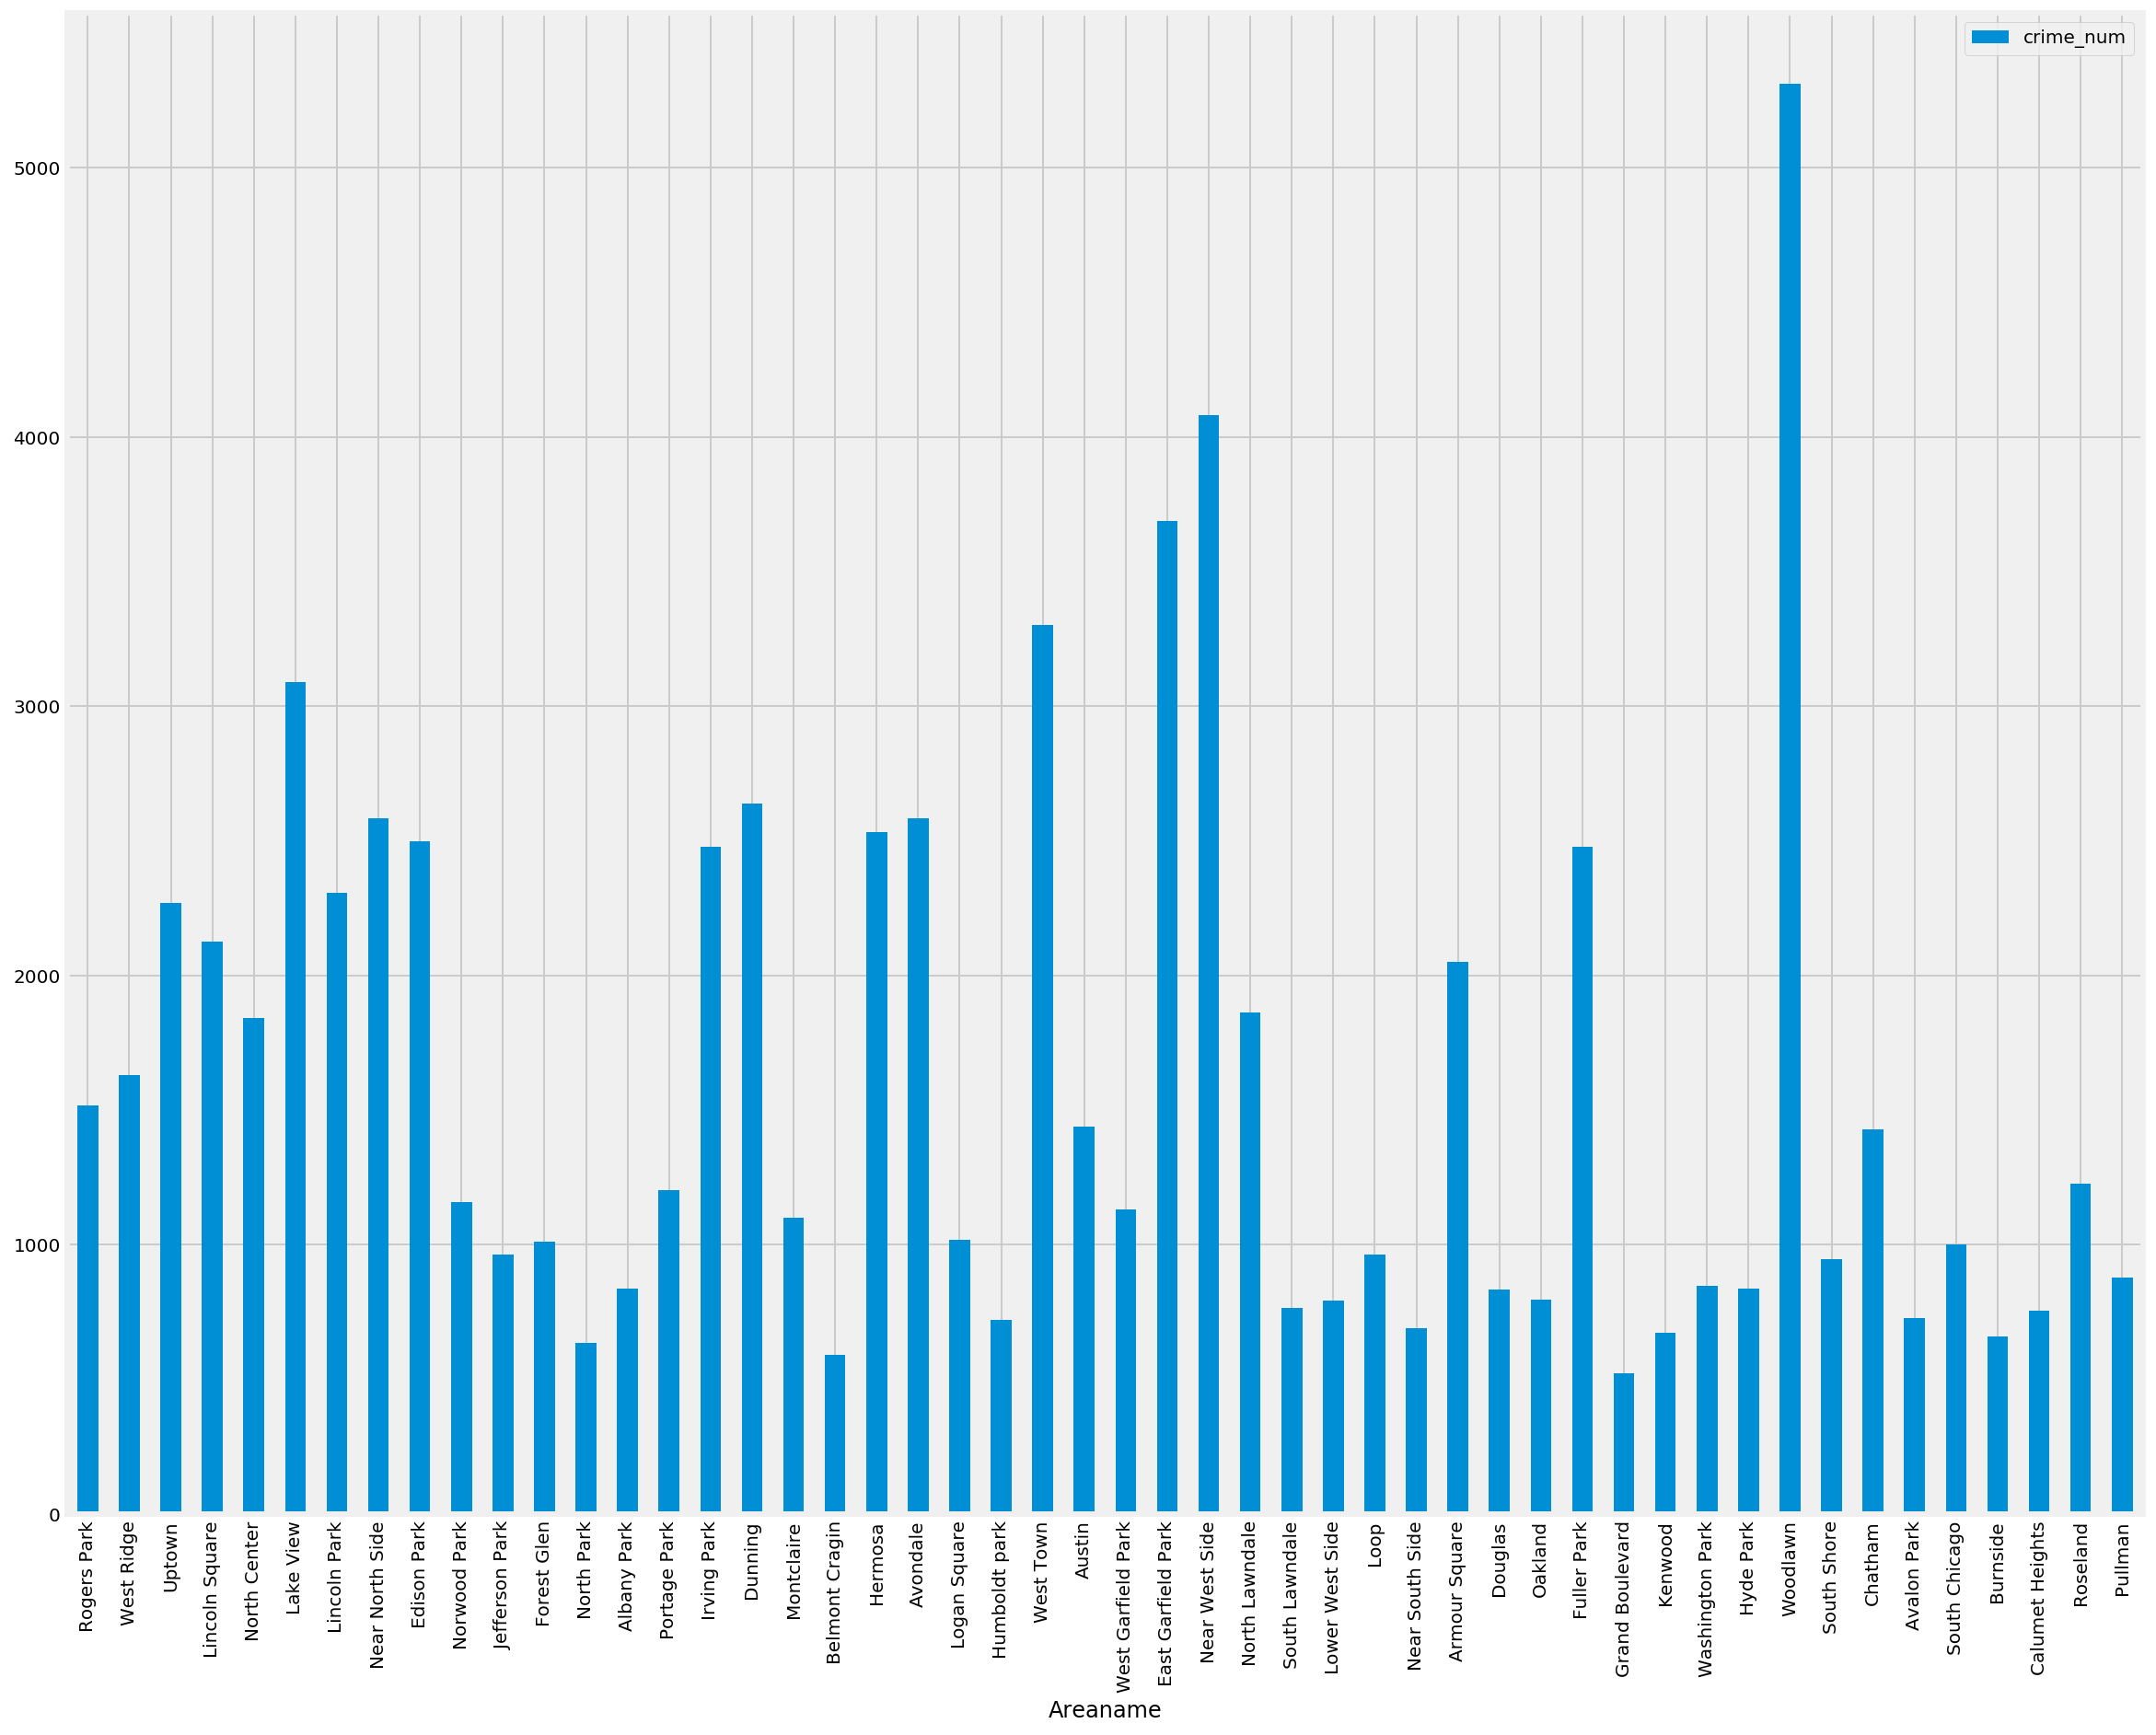

In [159]:
# plot the results as a bar chart
fig = main_df.plot.bar(x='Areaname', y='crime_num', rot=90, figsize=[18,15])
#plot(figsize=(20,10))

# Save plot
plt.savefig("Ctime.png", bbox_inches="tight")